# 1. Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п. Также можно сконвертировать в DataFrame любой из встроенных датасетов sklearn: (см. инструкцию). 
Главное условие к датасету, который вы загружаете - там должны быть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий.

In [3]:
import pandas as pd

# read csv files
dataset = pd.read_csv('lab2.csv')

# 2. Привести описание датасета.

In [12]:
description_list = [
"Уникальный идентификатор для каждого заказа на продажу",
 "Дата сделки купли-продажи",
 "Категория продаваемого продукта",
 "Конкретное название или модель продаваемого продукта",
 "Количество единиц продукта, проданного в рамках транзакции",
 "Цена одной единицы товара",
 "Общий доход, полученный от транзакции продажи (Количество * Цена за единицу)",
 "Географический регион, в котором произошла транзакция",
 "Способ оплаты"
]
dtypes_column = dataset.dtypes
df_info = pd.DataFrame({'Тип': dtypes_column, 'Описание': description_list})
pd.set_option('display.max_colwidth', None)
df_info

,Тип,Описание
Transaction ID,int64,Уникальный идентификатор для каждого заказа на продажу
Date,object,Дата сделки купли-продажи
Product Category,object,Категория продаваемого продукта
Product Name,object,Конкретное название или модель продаваемого продукта
Units Sold,int64,"Количество единиц продукта, проданного в рамках транзакции"
Unit Price,float64,Цена одной единицы товара
Total Revenue,float64,"Общий доход, полученный от транзакции продажи (Количество * Цена за единицу)"
Region,object,"Географический регион, в котором произошла транзакция"
Payment Method,object,Способ оплаты


Источник: https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data

In [13]:
dataset.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


# 3. matplotlib:

- Построить несколько графиков разного вида с использованием matplotlib.
- Построить несколько суб-графиков на одном графике используя .subplot.
- Построить интерактивный график со слайдером.

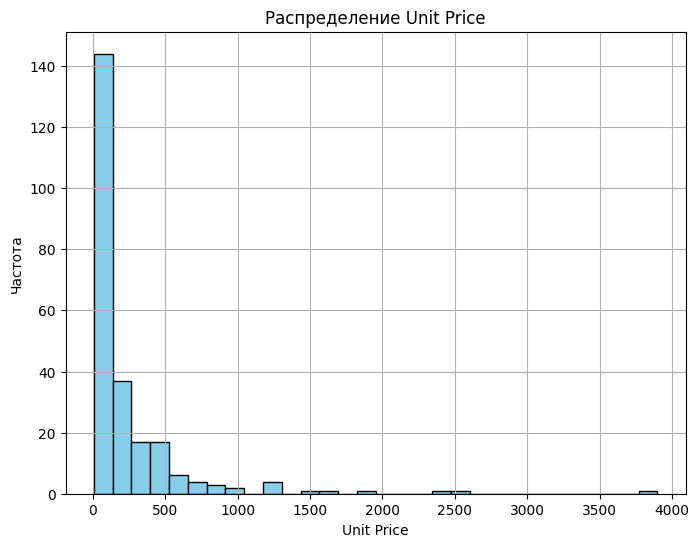

In [9]:
import matplotlib.pyplot as plt

ra_values = dataset['Unit Price']
plt.figure(figsize=(8, 6))
plt.hist(ra_values, bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Частота')
plt.grid(True)

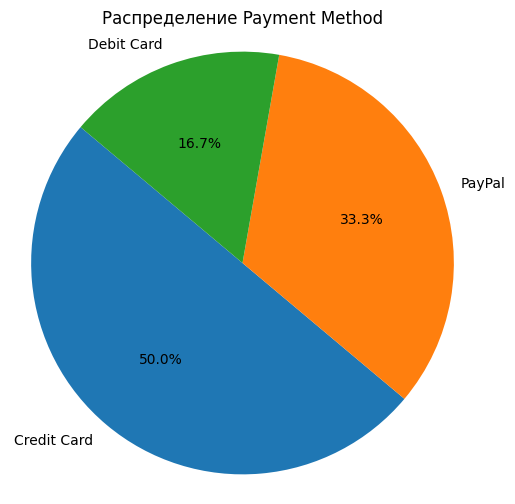

In [13]:
category_counts = dataset['Payment Method'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение Payment Method')
plt.axis('equal')  
plt.show()

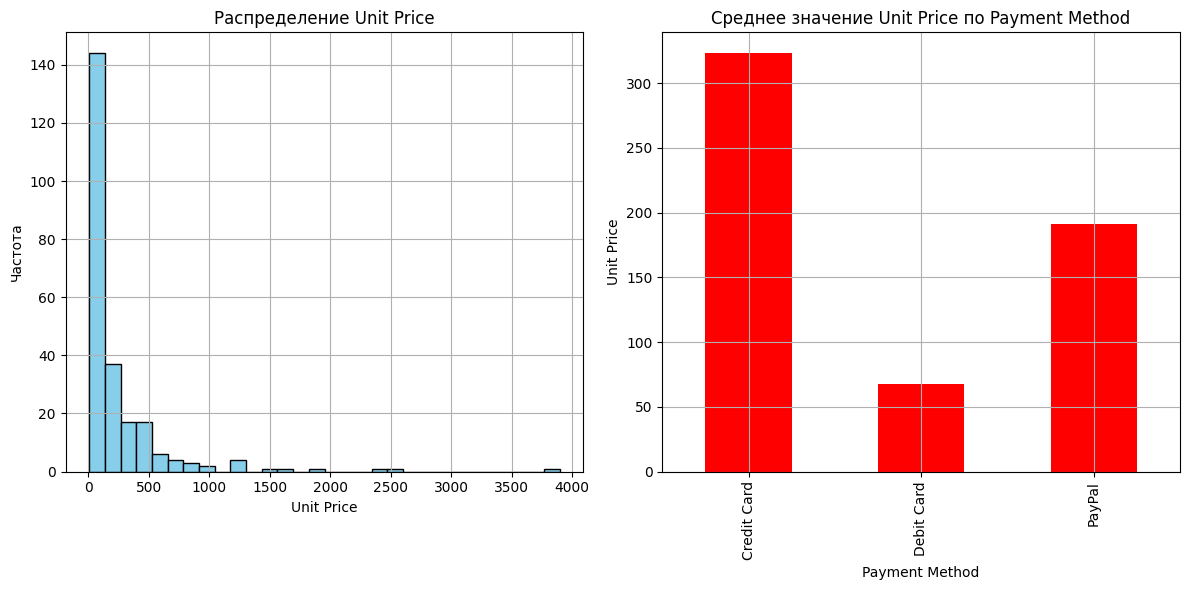

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].hist(ra_values, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Распределение Unit Price')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('Частота')
axes[0].grid(True)

mean_value_by_category = dataset.groupby('Payment Method')['Unit Price'].mean()
mean_value_by_category.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Среднее значение Unit Price по Payment Method')
axes[1].set_xlabel('Payment Method')
axes[1].set_ylabel('Unit Price')
axes[1].grid(True)

plt.tight_layout()

plt.show()

In [8]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import ipywidgets as widgets
from ipywidgets import interactive
from datetime import datetime


# преобразование столбца 'Date' в datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Группировка по дате и рассчет общего дохода за каждую дату
df_grouped = dataset.groupby('Date')['Total Revenue'].sum().reset_index()

# функция обновления графика
def update_plot(start_date, end_date):
    mask = (df_grouped['Date'] >= start_date) & (df_grouped['Date'] <= end_date)
    filtered_data = df_grouped[mask]
    
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_data['Date'], filtered_data['Total Revenue'], marker='o')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.title('Total Revenue Over Time')
    plt.grid(True)
    plt.show()

# диапазон дат для слайдера
date_range = pd.date_range(df_grouped['Date'].min(), df_grouped['Date'].max(), freq='D')
date_num = date2num(date_range)

# создание слайдера
start_date_slider = widgets.SelectionSlider(
    options=date_range,
    value=df_grouped['Date'].min(),
    description='Start Date',
    disabled=False,
    orientation='horizontal',
    readout=True
)

end_date_slider = widgets.SelectionSlider(
    options=date_range,
    value=df_grouped['Date'].max(),
    description='End Date',
    disabled=False,
    orientation='horizontal',
    readout=True
)

interactive_plot = interactive(update_plot, start_date=start_date_slider, end_date=end_date_slider)

interactive_plot

interactive(children=(SelectionSlider(description='Start Date', options=(Timestamp('2024-01-01 00:00:00'), Tim…

# 4. pandas:
- Построить три разных вида графиков с использованием pandas.DataFrame.plot / Series.plot.
    - Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
    - Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

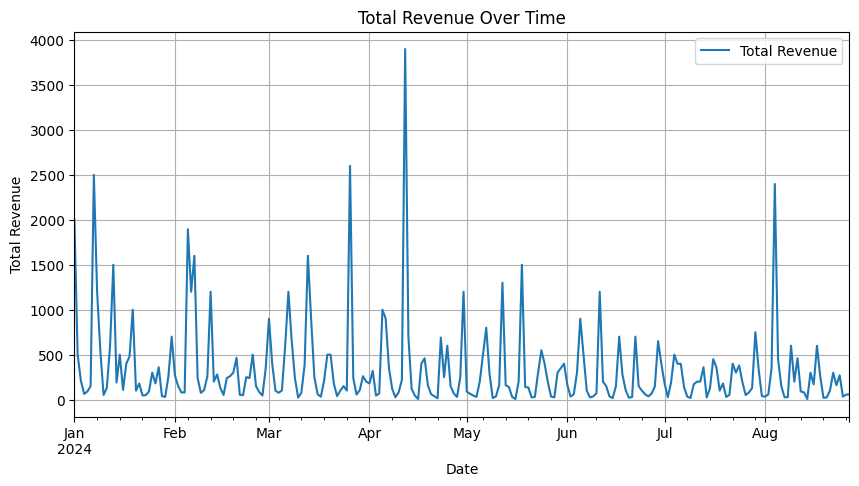

In [9]:
df_grouped.plot(x='Date', y='Total Revenue', kind='line', figsize=(10, 5), title='Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

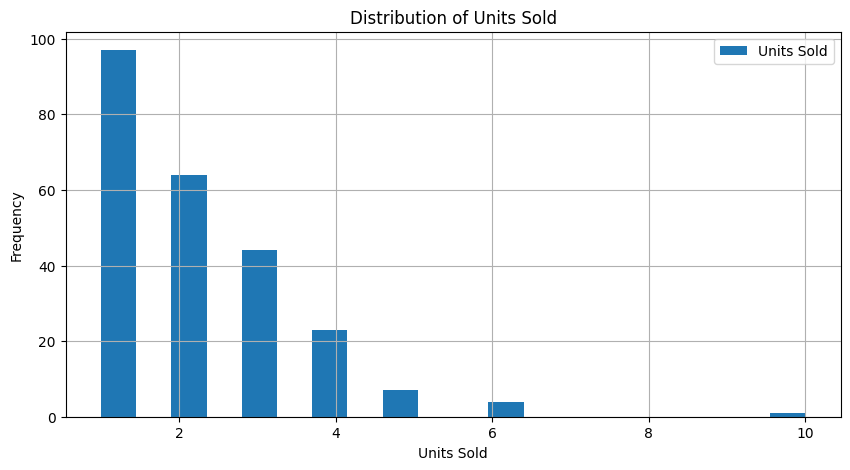

In [12]:
dataset.plot(y='Units Sold', kind='hist', bins=20, figsize=(10, 5), title='Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

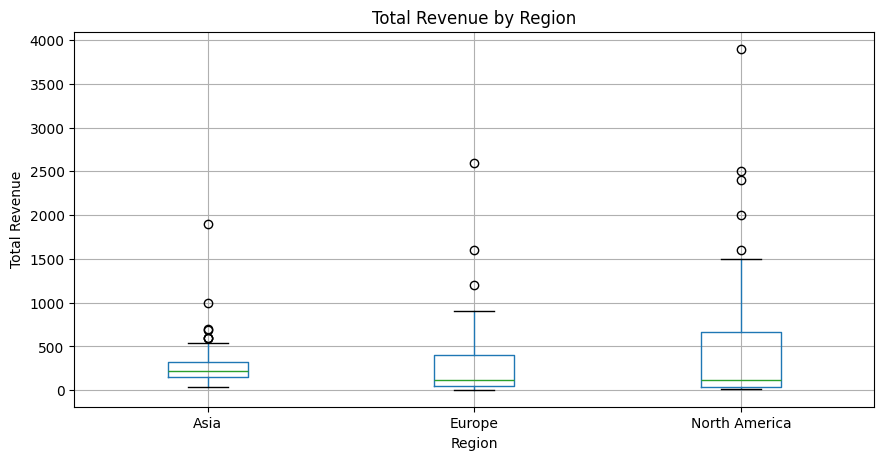

In [13]:
dataset.boxplot(column='Total Revenue', by='Region', figsize=(10, 5))
plt.title('Total Revenue by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

# 5. seaborn:
- Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.
- Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.
- Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.
- Построить график .heatmap попарной корреляции всех числовых признаков.
  - Категориальные признаки необходимо убрать из датафрейма перед построением.



In [14]:
# Drop categorical features for correlation analysis
df_numeric = dataset.select_dtypes(include=['number'])

# Display the first few rows of the numeric dataframe
df_numeric.head()

,Transaction ID,Units Sold,Unit Price,Total Revenue
0,10001,2,999.99,1999.98
1,10002,1,499.99,499.99
2,10003,3,69.99,209.97
3,10004,4,15.99,63.96
4,10005,1,89.99,89.99


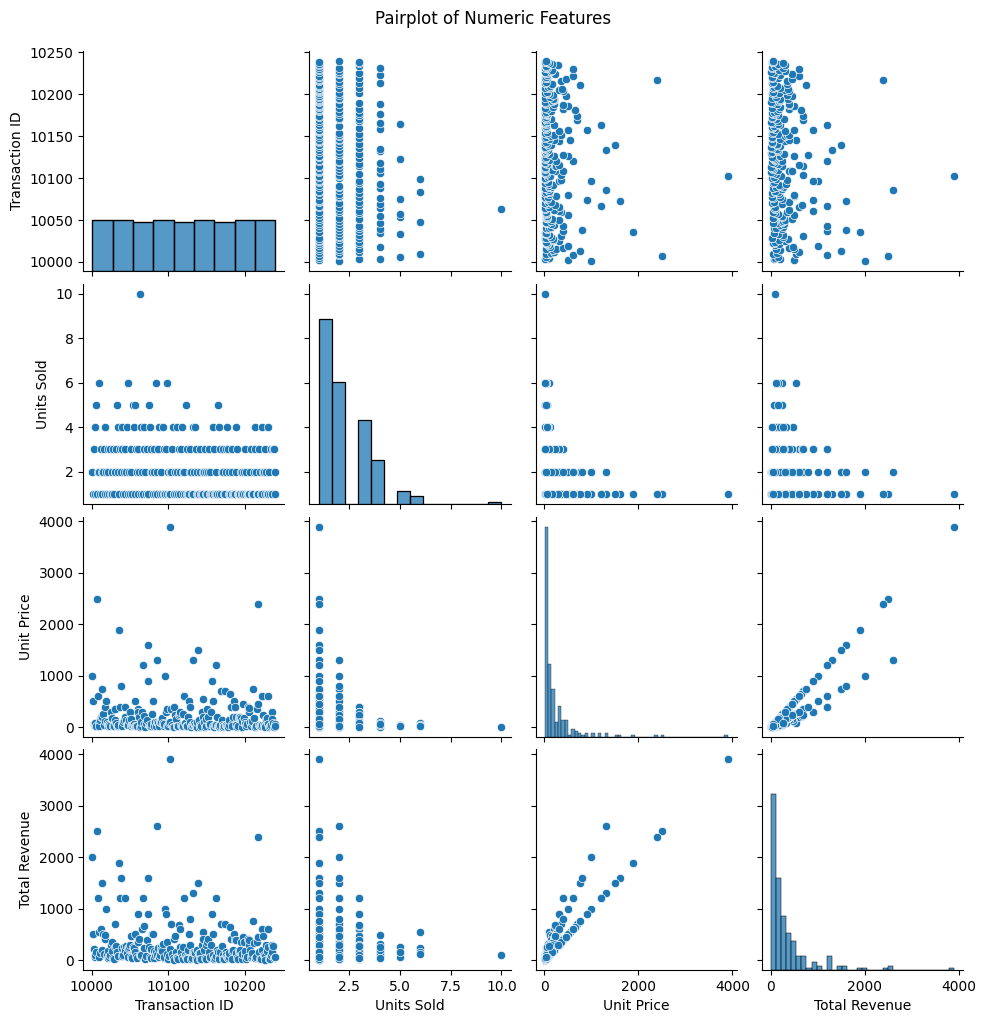

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset['Date'] = pd.to_datetime(dataset['Date'])

# Отброс категориальных признаков
df_numeric = dataset.select_dtypes(include=['number'])

# отображение первых строк
df_numeric.head()

# Pairplot числовых признаков
sns.pairplot(df_numeric)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

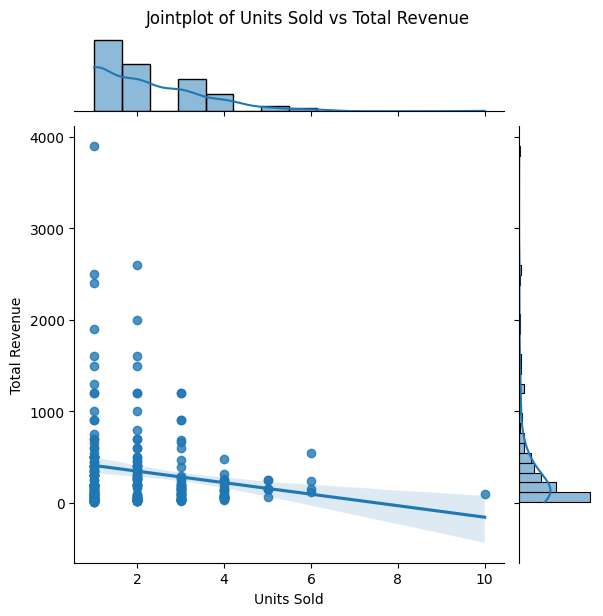

In [6]:
# Jointplot 'Units Sold' и 'Total Revenue'
sns.jointplot(x='Units Sold', y='Total Revenue', data=df_numeric, kind='reg')
plt.suptitle('Jointplot of Units Sold vs Total Revenue', y=1.02)
plt.show()

Jointplot показывает нам взаимосвязь между двумя числовыми признаками, включая линию регрессии

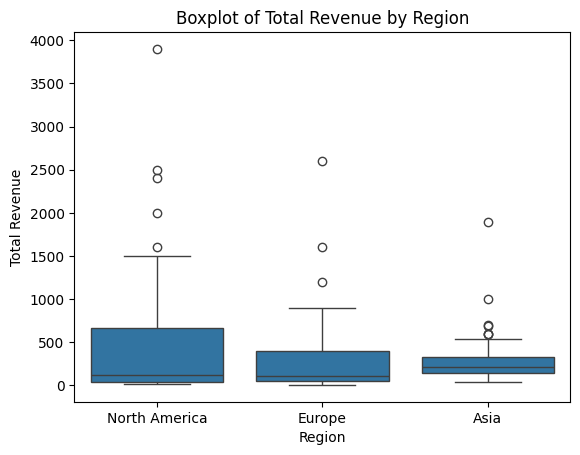

In [9]:
# Boxplot 'Total Revenue' by 'Region'
sns.boxplot(x='Region', y='Total Revenue', data=dataset)
plt.title('Boxplot of Total Revenue by Region')
plt.show()


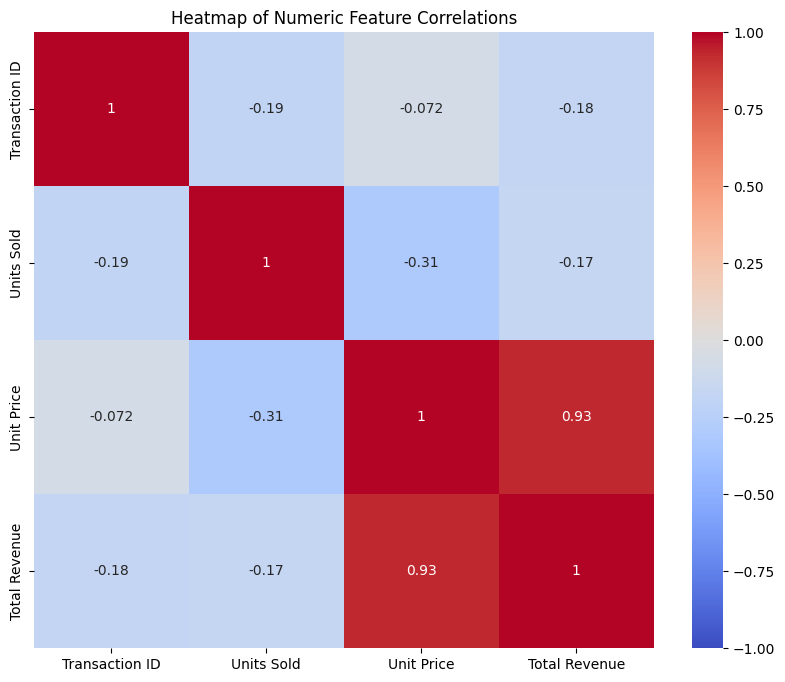

In [11]:
# Вычисление корреляционной матрицы
corr_matrix = df_numeric.corr()

# Heatmap корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Numeric Feature Correlations')
plt.show()

# 6. scipy.stats:
Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.

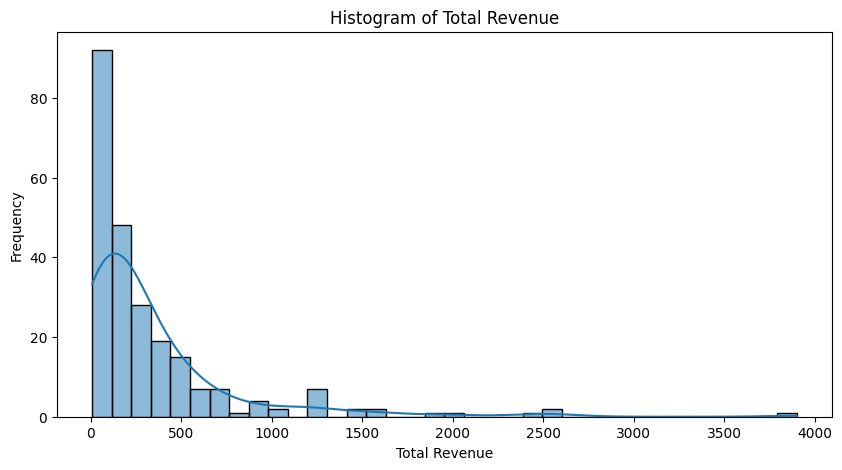

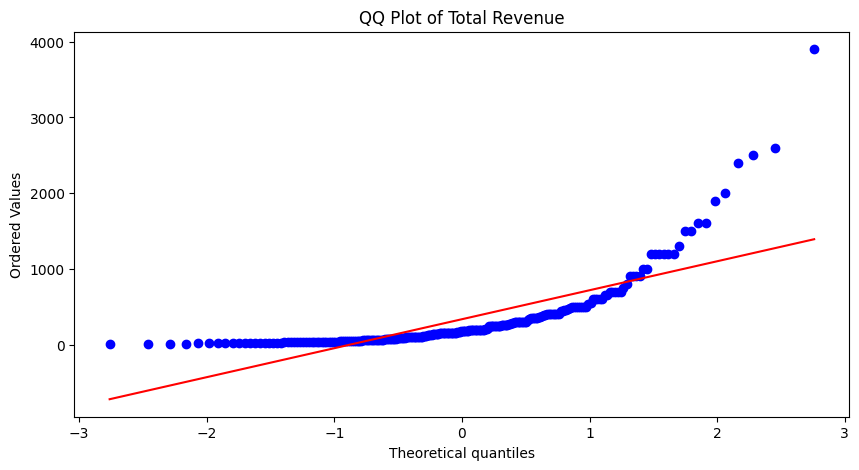

In [13]:
import scipy.stats as stats

dataset['Date'] = pd.to_datetime(dataset['Date'])

# выбор 'Total Revenue'
total_revenue = dataset['Total Revenue']

# гистограмма
plt.figure(figsize=(10, 5))
sns.histplot(total_revenue, kde=True)
plt.title('Histogram of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

# QQ-график
plt.figure(figsize=(10, 5))
stats.probplot(total_revenue, dist="norm", plot=plt)
plt.title('QQ Plot of Total Revenue')
plt.show()

# 7. plotly:
- Построить несколько графиков разного вида.
- Построить несколько суб-графиков на одном графике.
- Построить интерактивный график.

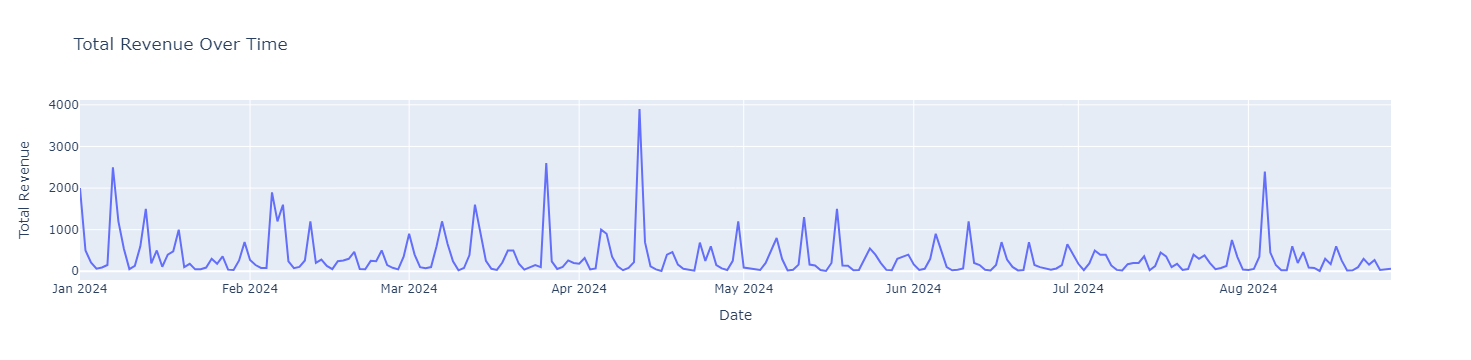

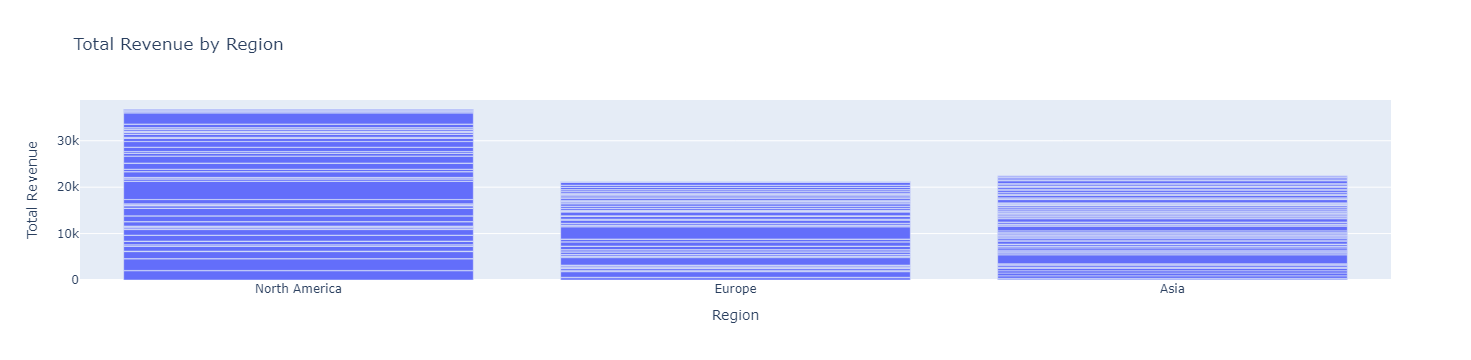

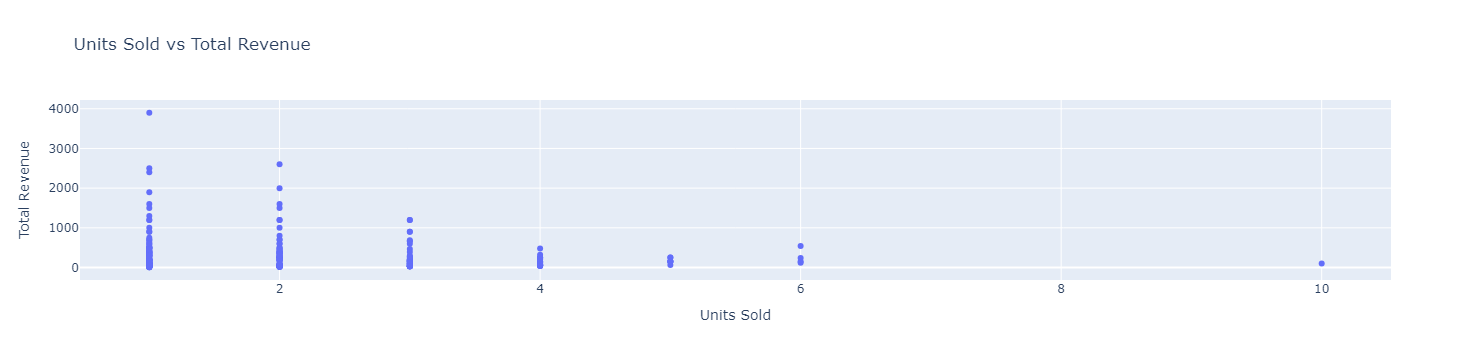

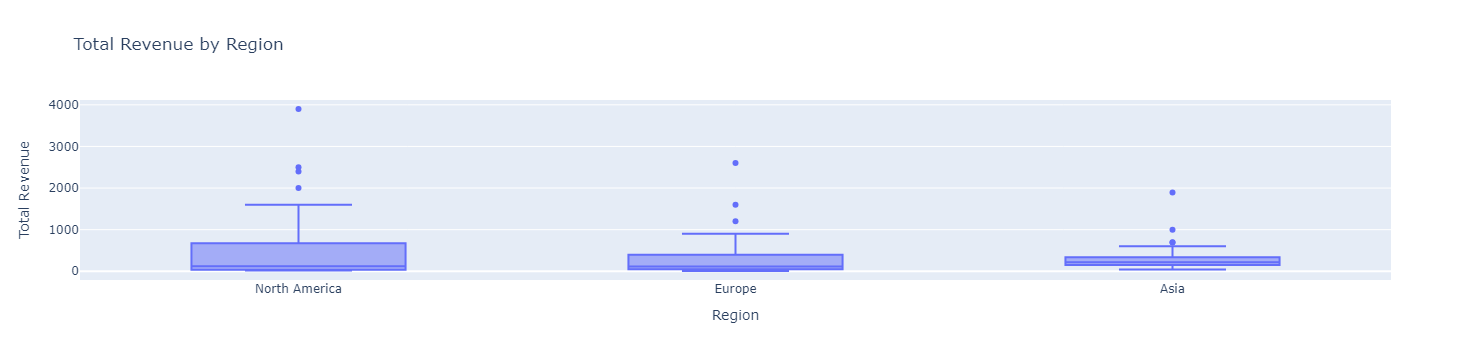

In [5]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

dataset['Date'] = pd.to_datetime(dataset['Date'])

# Line plot
fig_line = px.line(dataset, x='Date', y='Total Revenue', title='Total Revenue Over Time')
fig_line.show()

# Bar plot
fig_bar = px.bar(dataset, x='Region', y='Total Revenue', title='Total Revenue by Region')
fig_bar.show()

# Scatter plot
fig_scatter = px.scatter(dataset, x='Units Sold', y='Total Revenue', title='Units Sold vs Total Revenue')
fig_scatter.show()

# Box plot
fig_box = px.box(dataset, x='Region', y='Total Revenue', title='Total Revenue by Region')
fig_box.show()

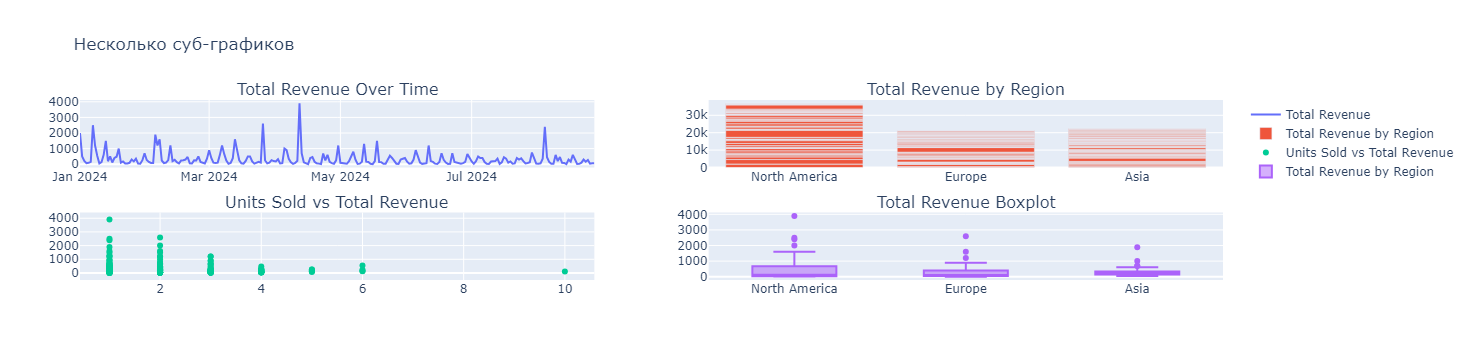

In [9]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('Total Revenue Over Time', 'Total Revenue by Region', 'Units Sold vs Total Revenue', 'Total Revenue Boxplot'))

fig.add_trace(go.Scatter(x=dataset['Date'], y=dataset['Total Revenue'], mode='lines', name='Total Revenue'), row=1, col=1)

fig.add_trace(go.Bar(x=dataset['Region'], y=dataset['Total Revenue'], name='Total Revenue by Region'), row=1, col=2)

fig.add_trace(go.Scatter(x=dataset['Units Sold'], y=dataset['Total Revenue'], mode='markers', name='Units Sold vs Total Revenue'), row=2, col=1)

fig.add_trace(go.Box(y=dataset['Total Revenue'], x=dataset['Region'], name='Total Revenue by Region'), row=2, col=2)

fig.update_layout(title_text='Несколько суб-графиков', showlegend=True)
fig.show()


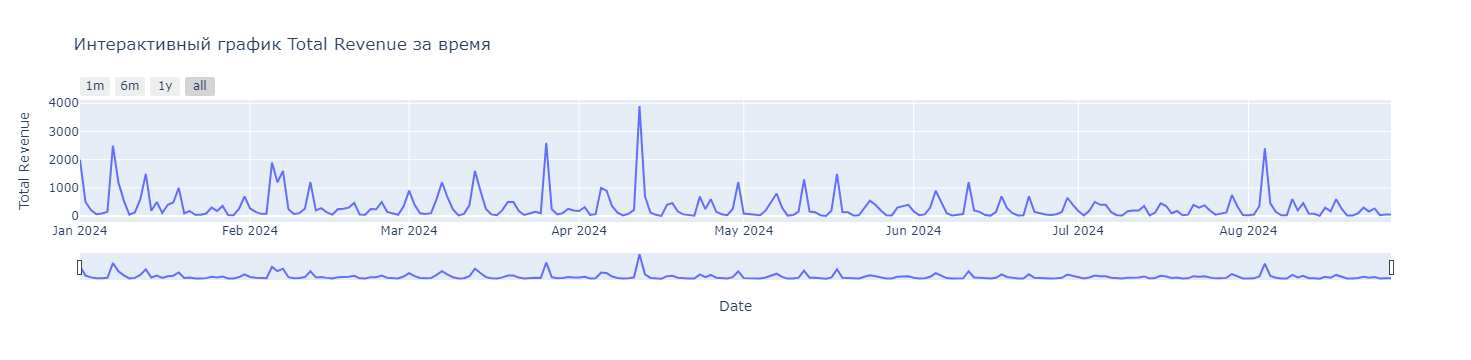

In [12]:
filtered_df = dataset[dataset['Date'].between(dataset['Date'].min(), dataset['Date'].max())]

fig = go.Figure()

fig.add_trace(go.Scatter(x=filtered_df['Date'], y=filtered_df['Total Revenue'], mode='lines', name='Total Revenue'))

fig.update_layout(
    title='Интерактивный график Total Revenue за время',
    xaxis_title='Date',
    yaxis_title='Total Revenue',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

fig.show()
